In [20]:
import os
import shutil
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [21]:
root = '/data/sarcopenia/all_levels/L3_gastric/data_split/'
data = {}
for file in os.listdir(root):
    print(file)
    tag = file.split('.')[0]
    if 'test' in tag:
        tag = 'testing'
    elif 'train' in tag:
        tag = 'training'
    else:
        tag='validation'
    filepath = os.path.join(root, file)
    data[tag] = {k: v for k, v in np.load(filepath).items()}
print([x for x in data['training'].keys()])


test_data.npz
train_data.npz
validation_data.npz
['slices', 'masks', 'id']


In [22]:
data['validation']['slices'].shape 

(32, 512, 512, 1)

In [23]:
root = '/data/sarcopenia/all_levels/split_data/'

names = {}
for file in os.listdir(os.path.join(root)):
    print(file)
    mask_path = os.path.join(root, file, 'masks')
    pids = [filename[:-7].rstrip('_') for filename in os.listdir(mask_path)]
    names[file] = pids

testing
validation
training


In [24]:
outdir = '/data/sarcopenia/all_levels/L3_gastric/split_data'

os.makedirs(os.path.join(outdir, 'training/slices'), exist_ok=True)
os.makedirs(os.path.join(outdir, 'training/masks'), exist_ok=True)
os.makedirs(os.path.join(outdir, 'testing/slices'), exist_ok=True)
os.makedirs(os.path.join(outdir, 'testing/masks'), exist_ok=True)
os.makedirs(os.path.join(outdir, 'validation/slices'), exist_ok=True)
os.makedirs(os.path.join(outdir, 'validation/masks'), exist_ok=True)
#** ==== **
for key, arr in data.items():
    ids = data[key]['id'] 
    # Go through names and match with name in other dict
    for i, name in enumerate(ids):
        slice_= data[key]['slices'][i]
        mask = data[key]['masks'][i]
        print(slice_.shape, mask.shape)
        ###
        # proj = np.argmax(mask, axis=-1)
        # fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        # ax.imshow(slice_, cmap='gray')
        # ax.imshow(np.where(proj==0, np.nan, proj), alpha=0.5)
        ###
        slice_path = os.path.join(outdir, f'{key}/slices/{name}.npy')
        mask_path = os.path.join(outdir, f'{key}/masks/{name}.npy')
        print(slice_path)
        print(mask_path)
        # Saving
        np.save(slice_path, slice_[..., 0])
        np.save(mask_path, mask)
        #break


(512, 512, 1) (512, 512, 4)
/data/sarcopenia/all_levels/L3_gastric/split_data/testing/slices/SARC_CC_014_21062013.npy
/data/sarcopenia/all_levels/L3_gastric/split_data/testing/masks/SARC_CC_014_21062013.npy
(512, 512, 1) (512, 512, 4)
/data/sarcopenia/all_levels/L3_gastric/split_data/testing/slices/SARC_CC_206_01112010.npy
/data/sarcopenia/all_levels/L3_gastric/split_data/testing/masks/SARC_CC_206_01112010.npy
(512, 512, 1) (512, 512, 4)
/data/sarcopenia/all_levels/L3_gastric/split_data/testing/slices/SARC_CC_300_21092012.npy
/data/sarcopenia/all_levels/L3_gastric/split_data/testing/masks/SARC_CC_300_21092012.npy
(512, 512, 1) (512, 512, 4)
/data/sarcopenia/all_levels/L3_gastric/split_data/testing/slices/SARC_CC_340_30122009.npy
/data/sarcopenia/all_levels/L3_gastric/split_data/testing/masks/SARC_CC_340_30122009.npy
(512, 512, 1) (512, 512, 4)
/data/sarcopenia/all_levels/L3_gastric/split_data/testing/slices/SARC_CC_342_28102009.npy
/data/sarcopenia/all_levels/L3_gastric/split_data/test

(512, 512) (512, 512, 4)
(512, 512) (512, 512, 4)
(512, 512) (512, 512, 4)
(512, 512) (512, 512, 4)
(512, 512) (512, 512, 4)
(512, 512) (512, 512, 4)


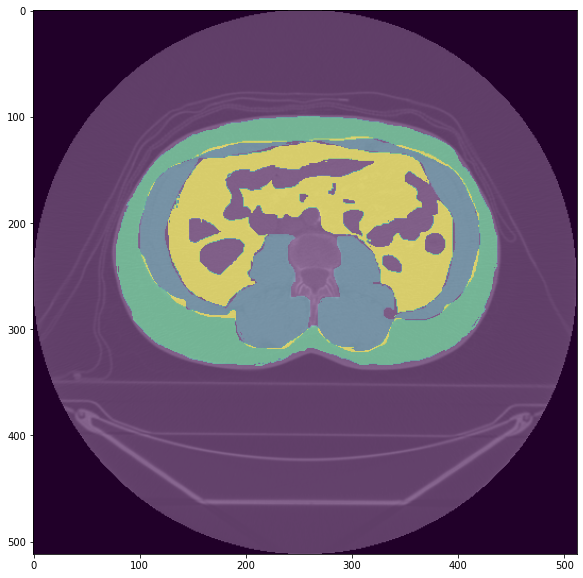

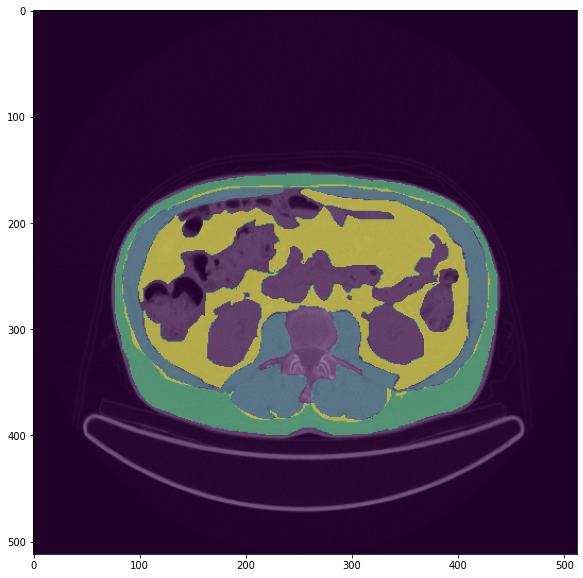

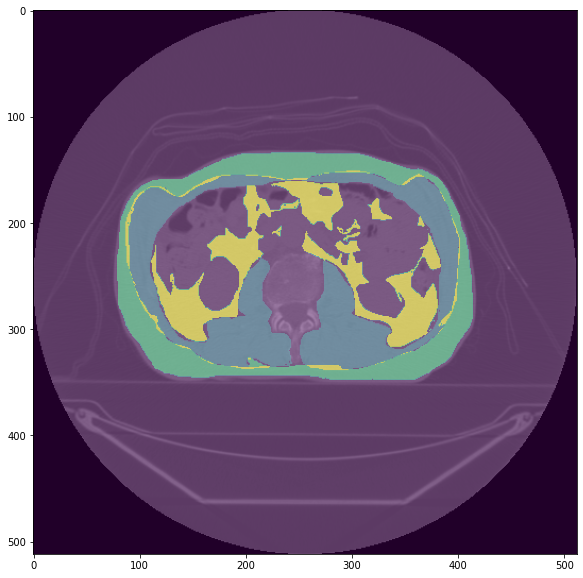

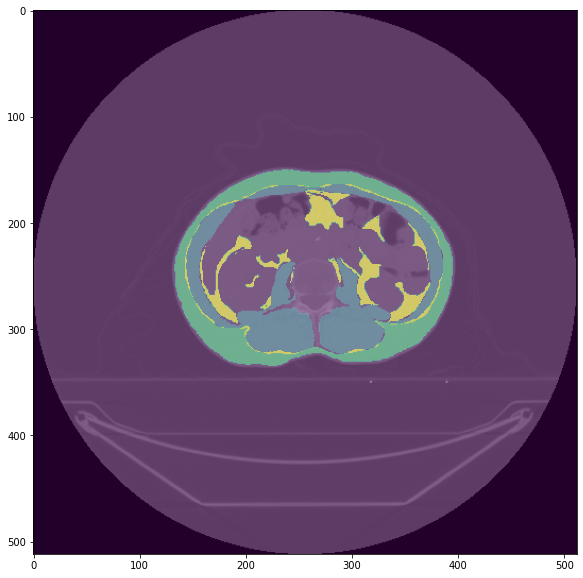

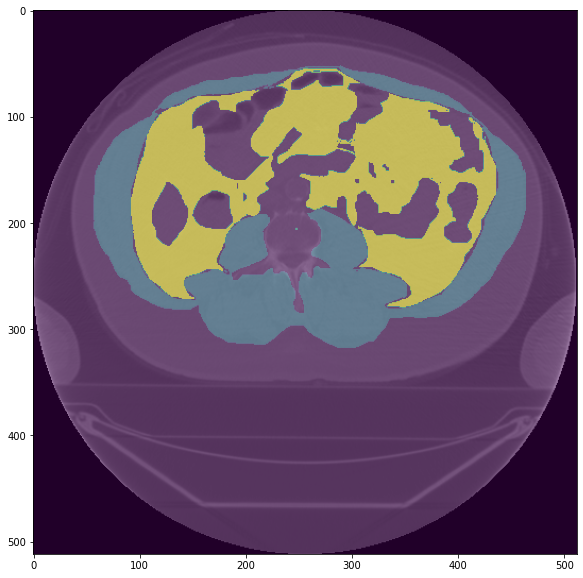

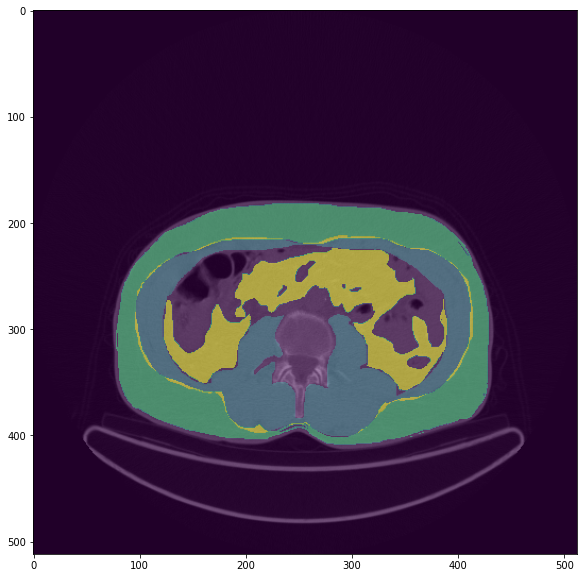

In [19]:
path = '/data/sarcopenia/all_levels/L3_gastric/split_data/testing'
slice_path = os.path.join(path, 'slices')
mask_path = os.path.join(path, 'masks')

for i, file in enumerate(os.listdir(slice_path)):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    slice_ = np.load(os.path.join(slice_path, file))
    mask = np.load(os.path.join(mask_path, file))
    print(slice_.shape, mask.shape)
    ax.imshow(slice_, cmap='gray')
    ax.imshow(np.argmax(mask, axis=-1), alpha=0.5)
    if i >4:
        break